In [3]:
import random, csv, time, os, pickle, re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import optimize
from scipy.stats import bernoulli
from scipy.io import savemat


%matplotlib inline

In [4]:
def R2(yhat, y):
    ybar = np.sum(y)/len(y) 
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    return ssreg/sstot

def matching_func(param, video_score, w_hat):
    return np.linalg.norm(video_score - param[0]*np.array(w_hat) - param[1])

def regularized_vector(video_score,w_hat):
    coeff = optimize.minimize(matching_func, [0, 0], args=(video_score, w_hat))
    a = coeff['x'][0]
    b = coeff['x'][1]
    v = a*np.array(w_hat)+b
    return v

In [5]:
path = './single_result/'
error_files = [f for f in os.listdir(path) if f.endswith('.p') and 'random' not in f]
random_error_files = [f for f in os.listdir(path) if f.endswith('.p') and 'random' in f]

In [46]:
error_results = dict()
random_error_results = dict()

for f in error_files:
    n, p = re.findall( r'\d+\.*\d', f )
    
    fname = os.path.join(path, f)
    temp = pickle.load( open( fname, "rb" ) )
    
    w_star = temp['video_score']
    w_hat_raw = temp['x']
    w_hat = regularized_vector(w_star,w_hat_raw)
    
    if n not in error_results.keys():
        error_results[n] = dict()
        
    if p not in error_results[n].keys():
        error_results[n][p] = R2(w_hat, w_star)
        
for f in random_error_files:
    n, p = re.findall( r'\d+\.*\d', f )
    
    fname = os.path.join(path, f)
    temp = pickle.load( open( fname, "rb" ) )
    
    w_star = temp['video_score']
    w_hat_raw = temp['x']
    w_hat = regularized_vector(w_star,w_hat_raw)
    
    if n not in random_error_results.keys():
        random_error_results[n] = dict()
        
    if p not in random_error_results[n].keys():
        random_error_results[n][p] = []
        
        random_error_results[n][p].append(R2(w_hat, w_star))

In [47]:
video_nums = [625,1250,2500,5000, 10000]
num_edges_pct = [0.1, 0.5,1 , 2.17, 3]

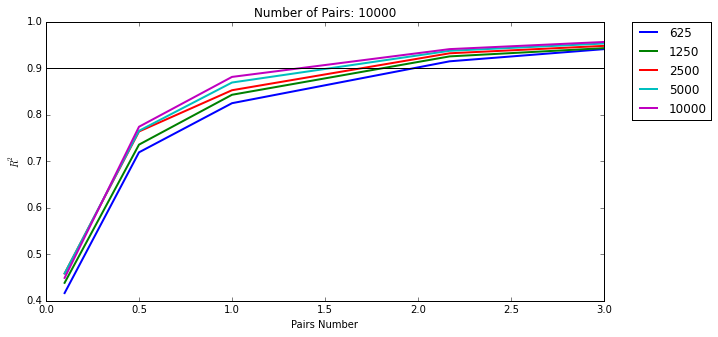

In [67]:
plt.figure(figsize=(10,5))
for video_num in video_nums:
    keys_str = error_results[str(video_num)].keys()
    keys_str = [keys_str[i].replace(".","") for i in range(len(keys_str))]
    keys = np.sort(np.array(keys_str).astype(int))
    r2 = []
    edges = []
    thresh = video_num*np.log(video_num)
    for key in keys:
        edges.append(key)
        r2.append(error_results[str(video_num)][str(key)])
        
    r2_random = []
    thresh_random = video_num*np.log(video_num)
    for key in keys:
        r2_random.append(random_error_results[str(video_num)][str(key)])
        
    

    plt.plot(num_edges_pct, r2,linewidth=2)
#     plt.plot(edges, r2_random,'b.-')
    
    plt.title('Number of Pairs: '+str(video_num))
    plt.ylabel(r'$R^2$')
    plt.xlabel(r"Pairs Number")
#     plt.axvline(x=thresh,linewidth=2, color='r')
    
    plt.legend(['625','1250','2500','5000','10000'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#     plt.legend([r'$R^2$',r'$R^2$ of random', r'$R^2 = 0.9$'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylim([0.4,1])
#     plt.xlim([0,edges[-1]*1.05])
#     plt.scatter(edges[3], r2_random[3],s=50)
plt.axhline(y=0.9,linewidth=1, color='k')

In [105]:
random_error_files

['random_error_10000_at_10000.p',
 'random_error_1250_at_1250.p',
 'random_error_1250_at_19342.p',
 'random_error_1250_at_26740.p',
 'random_error_1250_at_4456.p',
 'random_error_1250_at_8913.p',
 'random_error_2500_at_19560.p',
 'random_error_2500_at_2500.p',
 'random_error_2500_at_42445.p',
 'random_error_2500_at_58680.p',
 'random_error_2500_at_9780.p',
 'random_error_5000_at_127757.p',
 'random_error_5000_at_21292.p',
 'random_error_5000_at_42585.p',
 'random_error_5000_at_5000.p',
 'random_error_5000_at_92411.p',
 'random_error_625_at_12070.p',
 'random_error_625_at_2011.p',
 'random_error_625_at_4023.p',
 'random_error_625_at_625.p',
 'random_error_625_at_8731.p']

In [53]:
print random_error_results['10000']
print error_results['10000']

{'199864': [0.92191311003626053], '92103': [0.84316260715551572], '46051': [0.73129256810901455], '10000': [0.36675008188103453], '276310': [0.96457319960067645]}
{'199864': 0.94126324762945113, '92103': 0.8814916651466469, '46051': 0.77426892762024779, '10000': 0.4492464385180171, '276310': 0.95660326879917101}


In [76]:
r2_random

[[0.00098431862526897557],
 [4.8850154552823862e-05],
 [9.8838114507536826e-05],
 [0.93829929020979563],
 [0.95275537018285639]]

In [85]:
temp = pickle.load( open( fname, "rb" ) )

In [86]:
w_star = temp['video_score']
w_hat_raw = temp['x']
w_hat = regularized_vector(w_star,w_hat_raw)
R2(w_hat, w_star)

4.8850154552823862e-05

In [84]:
fname = './single_result/random_error_5000_at_21292.p'

In [ ]:
(1250,0.36163368477405183)
    (4456,0.69398244013881172)
    (8913,0.81987006180344402)
    (19342,0.89789855190059642)
    (26740,0.92577806087654224)